## Gradient Descent Implementation

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [6]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('D:\\upgrad\\ML\\Gradient+Descent\\gd\\Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [8]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'])
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [11]:
#Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,1.699279,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,1.699279,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,-0.587405,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,1.699279,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,1.699279,-0.844113,-0.69579


In [12]:
# Putting feature variable to X
X = housing['area']
# Putting response variable to y
y = housing['price']

In [23]:
# Conventional way to import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# To visualise in the notebook
%matplotlib inline

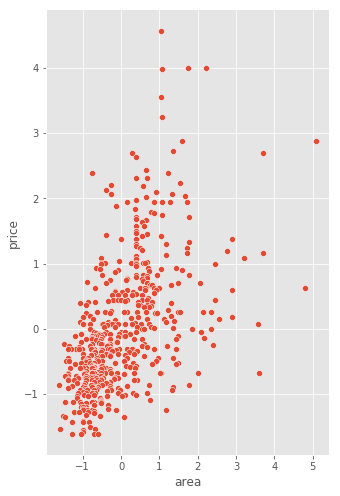

In [24]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

**For linear regressions we use a cost function known as the mean squared error or MSE.**

<img src="gd1.png"/>

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

<img src="gd2.png"/>

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [24]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [39]:
# Applying gradient descent by creating UDF.
def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.001):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [40]:
gradient(X,y)

,m_current,c_current,cost
0,0.001070,5.117211e-19,0.998165
1,0.002138,1.080481e-18,0.997021
2,0.003204,2.258744e-18,0.995882
3,0.004267,3.415820e-18,0.994747
4,0.005329,3.474489e-18,0.993617
5,0.006388,3.363670e-18,0.992491
6,0.007445,3.837909e-18,0.991370
7,0.008501,3.877021e-18,0.990254
8,0.009554,4.701642e-18,0.989141
9,0.010605,5.608562e-18,0.988034


C:\Users\Sumit Shukla\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


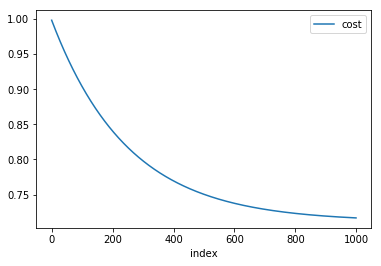

In [41]:
gradient(X,y).reset_index().plot.line(x='index', y=['cost'])

### Applying Gradient Descent for multiple variable

In [22]:
# Putting feature variable to X
X = housing[['area','bedrooms']]
# Putting response variable to y
y = housing['price']

In [23]:
## Add a columns of 1s as intercept to X.
X['intercept'] = 1
X = X.reindex_axis(['intercept','area','bedrooms'], axis=1)

C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [24]:
X.head()

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [25]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [26]:
# Theta needed to be changed with the number of response varaible used.
theta = np.matrix(np.array([0,0,0])) 
print(theta)
alpha = 0.01
iterations = 1000
print(X.T.shape)

[[0 0 0]]
(3, 545)


In [27]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

More on [Numpy Matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

<img src="gd.png"/>

In [28]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [29]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-1.36078712009e-18, 0.0053501386441, 0.003658...",0.494906
1,"[1.1244827699e-18, 0.0106413289519, 0.00727180...",0.490824
2,"[1.98821591199e-18, 0.0158742269672, 0.0108413...",0.486834
3,"[3.00676914559e-18, 0.0210494813749, 0.0143672...",0.482935
4,"[6.3476237518e-18, 0.026167733584, 0.017850146...",0.479124
5,"[8.40917549661e-18, 0.0312296178095, 0.0212905...",0.475400
6,"[8.31546859912e-18, 0.0362357611536, 0.0246888...",0.471759
7,"[1.0560359926e-17, 0.0411867836865, 0.02804574...",0.468202
8,"[1.00673801609e-17, 0.0460832985249, 0.0313615...",0.464724
9,"[1.28948839374e-17, 0.0509259119111, 0.0346369...",0.461326


C:\Users\Sumit Shukla\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


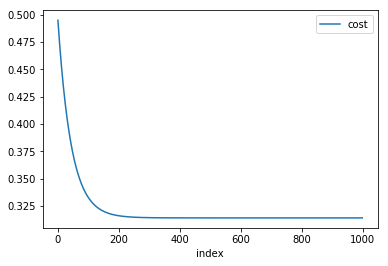

In [52]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])